## How to have Python Flask as Backend and Javascript in Frontend

- How to create dynamic Chartist.js charts based off data supplied by a server

- In this example, we use Flask as the server for the data

- Google trends data of keywords 'diet', 'gym' and 'finance' to see how they vary over time

- Data is from: https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

- Lets watch this video: https://www.youtube.com/watch?v=geKvJbQsOmM


       month  diet  gym  finance
0    2004-01   100   31       48
1    2004-02    75   26       49
2    2004-03    67   24       47
3    2004-04    70   22       48
4    2004-05    72   22       43
5    2004-06    64   24       45
6    2004-07    60   23       44
7    2004-08    59   28       44
8    2004-09    53   25       44
9    2004-10    52   24       45
10   2004-11    50   23       43
11   2004-12    42   24       41
12   2005-01    64   32       44
13   2005-02    54   28       48
14   2005-03    56   27       46
15   2005-04    56   25       44
16   2005-05    59   24       42
17   2005-06    53   25       44
18   2005-07    53   25       44
19   2005-08    51   28       44
20   2005-09    47   28       44
21   2005-10    46   27       43
22   2005-11    44   25       42
23   2005-12    40   24       38
24   2006-01    64   34       44
25   2006-02    51   29       44
26   2006-03    51   28       46
27   2006-04    50   27       47
28   2006-05    50   26       45
29   2006-

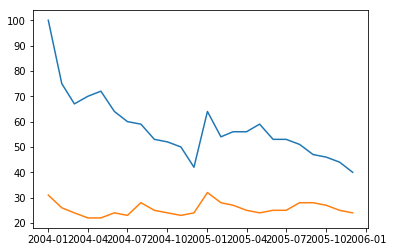

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.columns = ['month', 'diet', 'gym', 'finance']
print(df)

# df_new = df[(df['month'].str.contains('2005'))][['month', 'diet']]

# df_new = df[(reduce(lambda a, b: a | b, (df['month'].str.contains(s) for s in ['2004', '2005'])))][['month', 'diet']]
df_new = df[(reduce(lambda a, b: a | b, (df['month'].str.contains(s) for s in ['2004', '2005'])))][['month', 'diet', 'gym']]

print(df_new.head())

df_new['month'] = pd.to_datetime(df_new['month'])
df_new = df_new.sort_values(by=['month'])
print(df_new)
plt.plot(df_new['month'], df_new['diet'])
plt.plot(df_new['month'], df_new['gym'])
plt.show()

In [ ]:
from flask import Flask, request, jsonify
import matplotlib.pyplot as plt
from functools import reduce
import pandas as pd


# curl "http://0.0.0.0:3000/?n=2004&n=2005&m=diet&m=gym"
# https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

app = Flask(__name__)

df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.columns = ['month', 'diet', 'gym', 'finance']


@app.route('/', methods=['GET'])
def my_route():
    ls_year = request.args.getlist('n')
    ls_col = request.args.getlist('m')
    print(ls_year)

    df_new = df[(reduce(lambda a, b: a | b, (df['month'].str.contains(s) for s in ls_year)))][['month'] + ls_col]

    df_new['month'] = pd.to_datetime(df_new['month'])
    df_new = df_new.sort_values(by=['month'])

    return jsonify(df_new.to_json())


if __name__ == "__main__":
    app.run(host='0.0.0.0', port=3000)